<a href="https://colab.research.google.com/github/priyanshun2017/Deep_Learning_Honors/blob/main/Hands_on_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

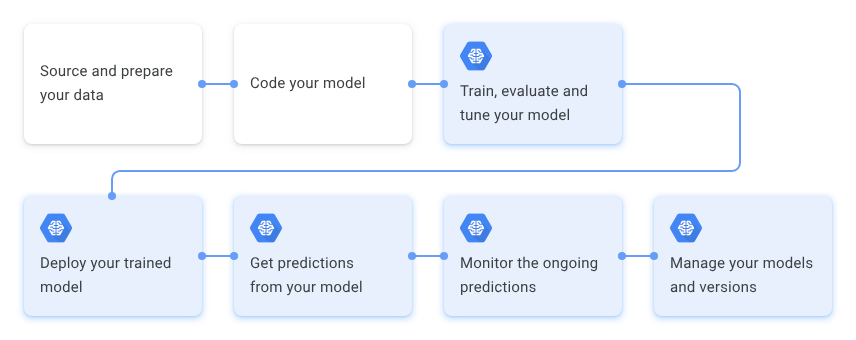

To develop and manage a production-ready model, you must work through the following stages:

1. Source and prepare your data.

2. Develop your model.

3. Train an ML model on your data:
  3.1 Train model
  3.2 Evaluate model accuracy
  3.3 Tune hyperparameters

4. Deploy your trained model.

5. Send prediction requests to your model:

  5.1 Online prediction
  5.2 Batch prediction

6. Monitor the predictions on an ongoing basis.

7. Manage your models and model versions.

These stages are iterative. You may need to reevaluate and go back to a previous step at any point in the process.

The rest of this page discusses the stages in detail[https://cloud.google.com/ai-platform/docs/ml-solutions-overview]

#### Data preprocessing is the concept of changing the **raw data** into a **clean data set**. The dataset is preprocessed in order to check missing values, noisy data, and other inconsistencies before executing it to the algorithm. Data must be in a format appropriate for ML.
#### For example, if the algorithm processes only numeric data then if a class is labeled with “malignant” or “benign” then it must be replaced by “0” or “1.” Data transformation and feature extraction are used to expand the performance of classifiers and hence a classification algorithm will be able to create a meaningful diagnosis. Only relevant features are selected and extracted for the particular disease

#### Data preprocessing is the concept of changing the **raw data** into a **clean data set**. The dataset is preprocessed in order to check missing values, noisy data, and other inconsistencies before executing it to the algorithm. Data must be in a format appropriate for ML.
#### For example, if the algorithm processes only numeric data then if a class is labeled with “malignant” or “benign” then it must be replaced by “0” or “1.” Data transformation and feature extraction are used to expand the performance of classifiers and hence a classification algorithm will be able to create a meaningful diagnosis. Only relevant features are selected and extracted for the particular disease

Key Topics:

- Handling Missing Values

- Working with Imbalanced Datasets

- SMOTE Technique

- Handling Outliers

- Data Encoding

- Feature Scaling

In [ ]:
# Selecting a dataset
# Finding missing values
# Handle missing values

 1. Handling Missing Values (Using Titanic Dataset)

In [ ]:

import pandas as pd
import numpy as np


url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print("Missing values:\n", df.isnull().sum())

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

print("\nMissing values after handling:\n", df.isnull().sum())

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-2-859e8e361348>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-2-859e8e361348>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

When handling missing values in a dataset, the choice of replacement method depends on the nature of the data and what makes sense in the context of the feature. Here's the logic behind using the mean and mode:

1. **Mean (for Age):**
   - The `Age` column contains continuous numerical values. Filling missing values with the mean is a common practice because it helps maintain the overall distribution of the data.
   - Using the mean is appropriate when the missing values are assumed to be random and the dataset is not heavily skewed. This prevents the loss of valuable data by filling gaps with a reasonable approximation.
   - In this case, replacing missing `Age` values with the mean ensures that the dataset remains complete without significantly altering the statistical characteristics of the `Age` feature.

2. **Mode (for Embarked):**
   - The `Embarked` column is categorical, meaning it contains discrete values representing different categories (e.g., ports where passengers embarked).
   - The mode is the most frequently occurring value in a column. Filling missing categorical values with the mode is a common approach because it is likely to represent the most typical or common category in the dataset.
   - Using the mode is sensible when you assume that most missing entries might belong to the most common category, ensuring consistency in the dataset.

By using these approaches, you ensure that the data remains complete while minimizing the introduction of bias or distortion. However, the choice of method should be evaluated depending on the specific dataset and problem context.

In [ ]:
import pandas as pd
import numpy as np


url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print("Missing values:\n", df.isnull().sum())

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True)

print("\nMissing values after handling:\n", df.isnull().sum())

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


2. Working with Imbalanced Datasets (Census Income)

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.datasets import fetch_openml

# Load the Adult dataset
adult = fetch_openml(name='adult', version=2, as_frame=True)
df = adult.frame

# Basic information about the dataset
print("Basic Info:")
print(df.info())

# Display the first few rows to understand the structure
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Features:")
print(df.describe())

# Check column data types to verify if any categorical features exist
print("\nData Types in the Dataset:")
print(df.dtypes)

# Identify features that are not strictly numerical
# Assuming any non-integer or float types (could be categorical)
categorical_features = [col for col in df.columns if df[col].dtype == 'object' or df[col].nunique() < 20]
numerical_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col not in categorical_features]

print("\nPotential Categorical Features (Based on Unique Values or Type):")
print(categorical_features)

# Show a summary of unique counts for each identified categorical feature
for feature in categorical_features:
    print(f"\nSummary for {feature}:")
    print(df[feature].value_counts())

# Show summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(df.describe())

# Distribution of the target variable
print("\nDistribution of Target Variable (class):")
print(df['class'].value_counts())

# Check for class imbalance
print("\nClass Imbalance:")
class_imbalance = df['class'].value_counts(normalize=True)
print(class_imbalance)

# Separating categorical and continuous features for easier viewing
print("\nCategorical Features Identified:", categorical_features)
print("Numerical Features Identified:", numerical_features)


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB
None

First 5 Rows:
   age  workclass  fnlwgt 

### Dataset Insights:

1. **Overview:**
   - 48,842 records with 15 features, including both numerical and categorical variables.
   - Target variable (`class`) is binary: `<=50K` or `>50K`.

2. **Numerical Features:**
   - **Age:** Range 17 to 90, median 37, average 38.6.
   - **Capital Gain & Loss:** Skewed distribution, mostly 0, with some high outliers.
   - **Hours-per-Week:** Mean of 40.4, typical full-time hours; some outliers.

3. **Categorical Features:**
   - **Workclass:** Predominantly private sector; has missing values.
   - **Education:** Mostly "HS-grad" and "Some-college"; diverse educational background.
   - **Race & Sex:** Mostly White; more males (32,650) than females (16,192).

4. **Missing Values:**
   - Present in `workclass`, `occupation`, and `native-country`. Requires handling.

5. **Class Imbalance:**
   - `<=50K`: 76%, `>50K`: 24%. Needs attention to avoid biased models.

6. **General Considerations:**
   - Requires handling missing values, encoding categorical features, addressing outliers, and balancing classes to build effective models.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import fetch_openml

adult = fetch_openml(name='adult', version=2, as_frame=True)
df = adult.frame

df['income'] = df['class'].apply(lambda x: 1 if x == '>50K' else 0) # Instead of for-loop use lambda function

X = df.drop(columns=['class', 'income'])
y = df['income']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Class distribution in training set:\n", y_train.value_counts())

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)
model.fit(X_res, y_res)

y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Class distribution in training set:
 income
0    29676
1     9397
Name: count, dtype: int64

Accuracy: 0.8158460436073293

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.87      7479
           1       0.57      0.85      0.68      2290

    accuracy                           0.82      9769
   macro avg       0.76      0.83      0.78      9769
weighted avg       0.86      0.82      0.83      9769



3. SMOTE Technique (Census Income)

Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases.

The new instances are not just copies of existing minority cases. Instead, the algorithm takes samples of the feature space for each target class and its nearest neighbors. The algorithm then generates new examples that combine features of the target case with features of its neighbors. This approach increases the features available to each class and makes the samples more general.

SMOTE takes the entire dataset as an input, but it increases the percentage of only the minority cases. For example, suppose you have an imbalanced dataset where just 1 percent of the cases have the target value A (the minority class), and 99 percent of the cases have the value B. To increase the percentage of minority cases to twice the previous percentage, you would enter 200 for SMOTE percentage in the component's properties.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

model.fit(X_smote, y_smote)

y_pred_smote = model.predict(X_test)
print("\nAccuracy after SMOTE:", accuracy_score(y_test, y_pred_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))


Accuracy after SMOTE: 0.8541304125294298

Confusion Matrix:
 [[6824  655]
 [ 770 1520]]


4. Handling Outliers (Boston Housing Dataset)

An outlier is a data point that significantly deviates from the rest of the data. It can be either much higher or much lower than the other data points, and its presence can have a significant impact on the results of machine learning algorithms. They can be caused by measurement or execution errors. The analysis of outlier data is referred to as outlier analysis or outlier mining.

There are several methods for detecting outliers, including:


Distance-based measures: These measures, like Z-score and interquartile range (IQR), calculate the distance of a data point from the center of the data distribution.
Visualization techniques: Techniques like boxplots and scatter plots can visually identify data points that lie far away from the majority of the data.
Clustering algorithms: Clustering algorithms can automatically group similar data points, isolating outliers as separate clusters.

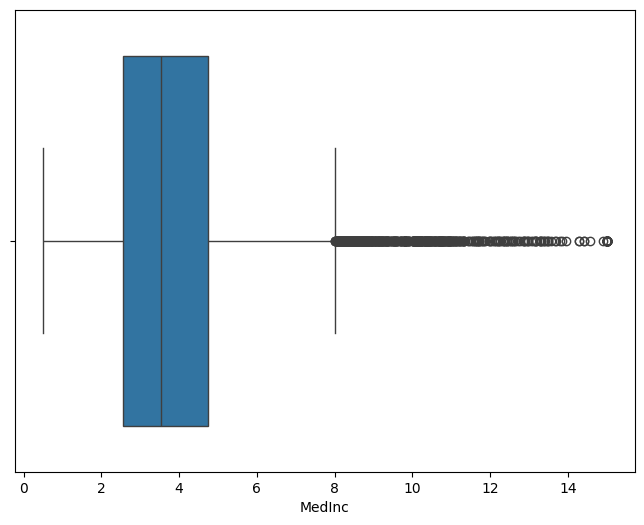

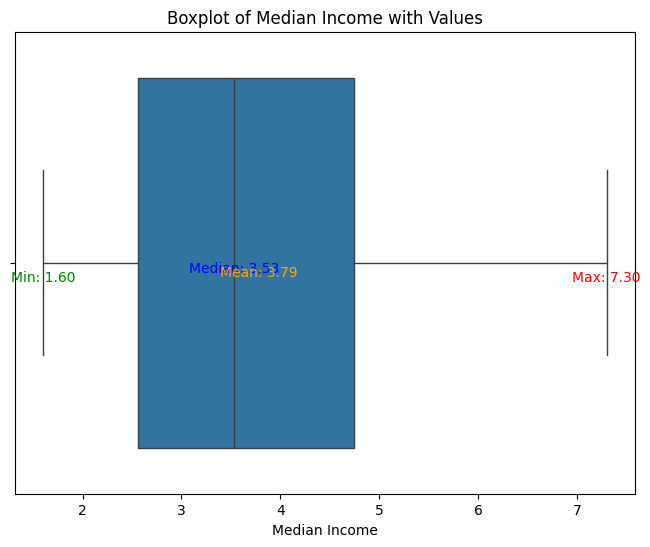

In [ ]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Step 2: Load the dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Step 3: Initial boxplot to visualize outliers
plt.figure(figsize=(8, 6))  # Optional: Set the size of the figure
sns.boxplot(x=df['MedInc'])  # 'MedInc' = Median Income, example feature

# Step 4: Determine thresholds using 5th and 95th percentiles
q_low = df['MedInc'].quantile(0.05)
q_high = df['MedInc'].quantile(0.95)

# Step 5: Handle outliers using capping and flooring
df['MedInc'] = np.where(df['MedInc'] < q_low, q_low, df['MedInc'])
df['MedInc'] = np.where(df['MedInc'] > q_high, q_high, df['MedInc'])

# Step 6: Boxplot after outlier handling
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MedInc'])

# Step 7: Annotate the boxplot with values
# Calculate the statistics for annotation
median = df['MedInc'].median()
mean = df['MedInc'].mean()
min_val = df['MedInc'].min()
max_val = df['MedInc'].max()

# Annotate median and mean on the boxplot
plt.text(median, 0.02, f'Median: {median:.2f}', horizontalalignment='center', color='blue')
plt.text(mean, 0.03, f'Mean: {mean:.2f}', horizontalalignment='center', color='orange')
plt.text(min_val, 0.04, f'Min: {min_val:.2f}', horizontalalignment='center', color='green')
plt.text(max_val, 0.04, f'Max: {max_val:.2f}', horizontalalignment='center', color='red')

# Show the plot
plt.title('Boxplot of Median Income with Values')
plt.xlabel('Median Income')
plt.show()


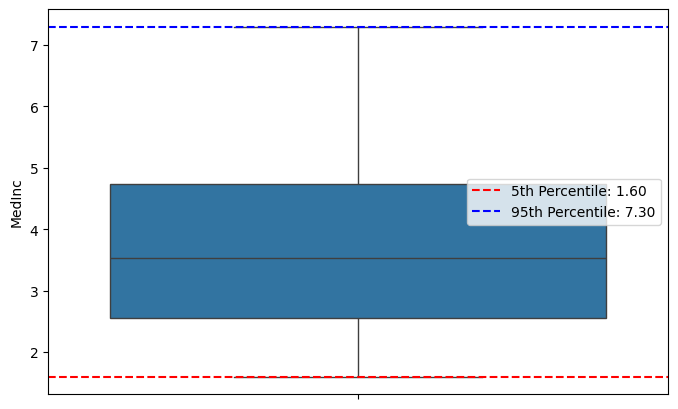

In [ ]:
import matplotlib.pyplot as plt

# Before plotting the final boxplot, plot and show the thresholds
plt.figure(figsize=(8, 5))
sns.boxplot(df['MedInc'])
plt.axhline(y=q_low, color='r', linestyle='--', label=f'5th Percentile: {q_low:.2f}')
plt.axhline(y=q_high, color='b', linestyle='--', label=f'95th Percentile: {q_high:.2f}')
plt.legend()
plt.show()

5. Data Encoding (Using Titanic Dataset)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print("\nInitial Data:\n", df.head())

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True)

df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

print("\nEncoded Data:\n", df_encoded.head())


Initial Data:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

6. Feature Scaling (Using Boston Housing Dataset)

In [ ]:
# Importing libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import fetch_california_housing

# Load California Housing Dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Display the first few rows of the dataset
print("\nOriginal Data:\n", df.head())

# Standard Scaling (Z-score normalization)
scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the Standard Scaled Data (example: first 5 rows)
print("\nStandard Scaled Data:\n", df_standard_scaled.head())

# Min-Max Scaling (normalizing to a range [0, 1])
min_max_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)

# Display the Min-Max Scaled Data (example: first 5 rows)
print("\nMin-Max Scaled Data:\n", df_minmax_scaled.head())



Original Data:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Standard Scaled Data:
      MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 1: Load the dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Display the first few rows of the dataset
print("Original Data:\n", df.head())

# Step 2: Define features to scale (e.g., 'MedInc' and 'HouseAge')
features_to_scale = ['MedInc', 'HouseAge']

# Step 3: Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = df.copy()
df_min_max_scaled[features_to_scale] = min_max_scaler.fit_transform(df[features_to_scale])

# Display the scaled data
print("\nMin-Max Scaled Data:\n", df_min_max_scaled.head())

# Step 4: Normalization (Z-score scaling)
standard_scaler = StandardScaler()
df_normalized = df.copy()
df_normalized[features_to_scale] = standard_scaler.fit_transform(df[features_to_scale])

# Display the normalized data
print("\nNormalized Data (Z-score):\n", df_normalized.head())


Original Data:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Min-Max Scaled Data:
      MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.539668  0.784314  6.984127   1.023810       322.0  2.555556     37.88   
1  0.538027  0.392157  6.238137   0.971880      2401.0  2.109842     37.86   
2  0.466028  1.000000  8.288136   1.073446       496.0  2.802260     37.85   
3  0.354699  1.000000  5

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 152ms/step - accuracy: 0.2697 - loss: 1.9383 - val_accuracy: 0.4992 - val_loss: 1.3812
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 146ms/step - accuracy: 0.4551 - loss: 1.4976 - val_accuracy: 0.5444 - val_loss: 1.2623
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 145ms/step - accuracy: 0.5148 - loss: 1.3542 - val_accuracy: 0.5859 - val_loss: 1.1417
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 142ms/step - accuracy: 0.5492 - loss: 1.2777 - val_accuracy: 0.6101 - val_loss: 1.1033
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 143ms/step - accuracy: 0.5747 - loss: 1.2056 - val_accuracy: 0.6443 - val_loss: 1.0064
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 113s 144ms/step - accuracy: 0.6015 - loss: 1.1418 - val_accuracy: 0.6634 - val_loss: 0.9640
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 143ms/step - accuracy: 0.6117 - loss: 1.1043 - val_accuracy: 0.6680 - val_loss: 0.9535
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 149s 152ms/step - accuracy: 0.6286 - loss: 1.06

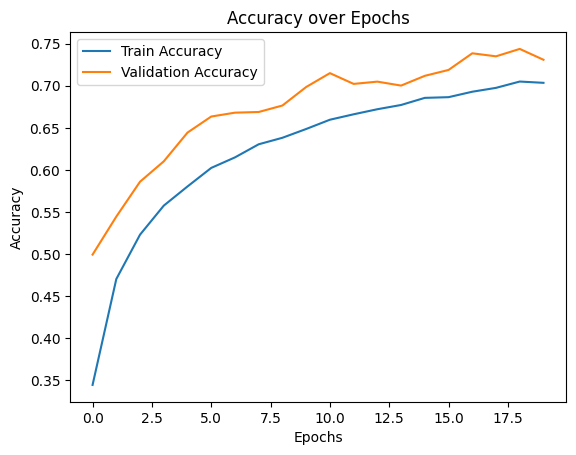

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Display the shape of the dataset
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Data Augmentation to increase the dataset size and variability
datagen = ImageDataGenerator(
    rotation_range=15,    # Randomly rotate images by up to 15 degrees
    width_shift_range=0.1,  # Shift the width of the image randomly by 10%
    height_shift_range=0.1, # Shift the height of the image randomly by 10%
    horizontal_flip=True,   # Flip images horizontally
    zoom_range=0.1,         # Zoom images randomly by up to 10%
)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout for regularization
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using data augmentation
batch_size = 64
epochs = 20

# Fit the model using augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("\nTest Accuracy:", test_accuracy)

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Assignment: -> Given this dataset proceed with data-preprocessing [Online-Certificate]
### -> Given this dataset proceed through the ML Workflow and submit it [You give yourself a mini-project/experience]
#### Dataset:
url = 'https://raw.githubusercontent.com/ronitf/heart-disease-uci/master/heart.csv'
data = pd.read_csv(url)